In [1]:
import pandas as pd
import numpy as np

import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.callbacks import History

from bs4 import BeautifulSoup
import re,string,unicodedata
from string import punctuation

In [2]:
import os 
os.chdir("C:\\Users\\86182\\Desktop")

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df

,text,category
0,WASHINGTON (Reuters) head conservative Republi...,1
1,WASHINGTON (Reuters) Transgender people allowe...,1
2,WASHINGTON (Reuters) special counsel investiga...,1
3,WASHINGTON (Reuters) Trump campaign adviser Ge...,1
4,SEATTLE/WASHINGTON (Reuters) President Donald ...,1
...,...,...
44884,21st Century Wire says 21WIRE reported earlier...,0
44885,21st Century Wire says familiar theme. Wheneve...,0
44886,Patrick Henningsen 21st Century WireRemember O...,0
44887,21st Century Wire says Al Jazeera America go h...,0


In [6]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,stop_words='english')
X = tfidf_vectorizer.fit_transform(df['text'])
feature_names = tfidf_vectorizer.get_feature_names_out()
data= pd.DataFrame(X.toarray(), columns=feature_names)

In [7]:
data_train, data_test, y_train, y_test = train_test_split(data, df['category'], test_size = 0.3, random_state=42)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(data_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 假设是一个二分类问题

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 设置早停和模型检查点
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs')


In [16]:
history = model.fit(data_train, y_train, validation_split=0.2, epochs=50, batch_size=64, callbacks=[early_stopping, model_checkpoint, tensorboard], verbose=1)

Epoch 1/50
393/393 [==============================] - 4s 9ms/step - loss: 0.1054 - accuracy: 0.9696 - val_loss: 0.0472 - val_accuracy: 0.9852
Epoch 2/50
393/393 [==============================] - 3s 8ms/step - loss: 0.0128 - accuracy: 0.9965 - val_loss: 0.0355 - val_accuracy: 0.9881
Epoch 3/50
393/393 [==============================] - 3s 8ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0418 - val_accuracy: 0.9870
Epoch 4/50
393/393 [==============================] - 3s 8ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0471 - val_accuracy: 0.9871
Epoch 5/50
393/393 [==============================] - 3s 8ms/step - loss: 1.8186e-04 - accuracy: 1.0000 - val_loss: 0.0480 - val_accuracy: 0.9874
Epoch 6/50
393/393 [==============================] - 3s 8ms/step - loss: 5.0205e-05 - accuracy: 1.0000 - val_loss: 0.0480 - val_accuracy: 0.9879
Epoch 7/50
393/393 [==============================] - 3s 8ms/step - loss: 2.8166e-05 - accuracy: 1.0000 - val_loss: 0.0490 - val_accuracy: 0

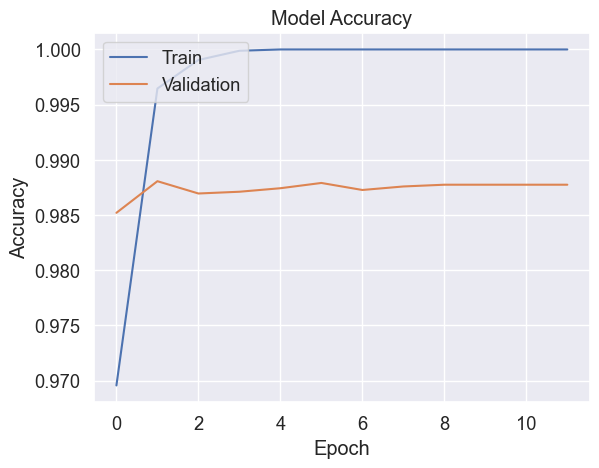

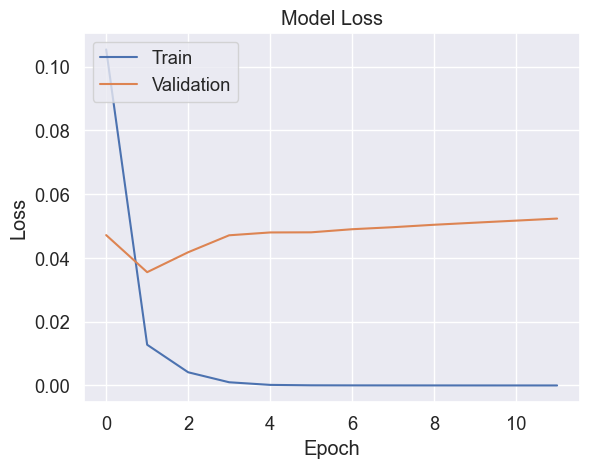

In [17]:
import matplotlib.pyplot as plt

# 绘制精度图
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 绘制损失图
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
from sklearn.metrics import classification_report
import numpy as np

# 预测测试集
with tf.device('/CPU:0'): 
    y_pred = model.predict(data_test)
    y_pred = np.round(y_pred).astype(int).flatten()  # 将输出四舍五入并转换为整数

# 生成分类报告
print(classification_report(y_test, y_pred))

421/421 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6990
           1       0.99      0.99      0.99      6477

    accuracy                           0.99     13467
   macro avg       0.99      0.99      0.99     13467
weighted avg       0.99      0.99      0.99     13467



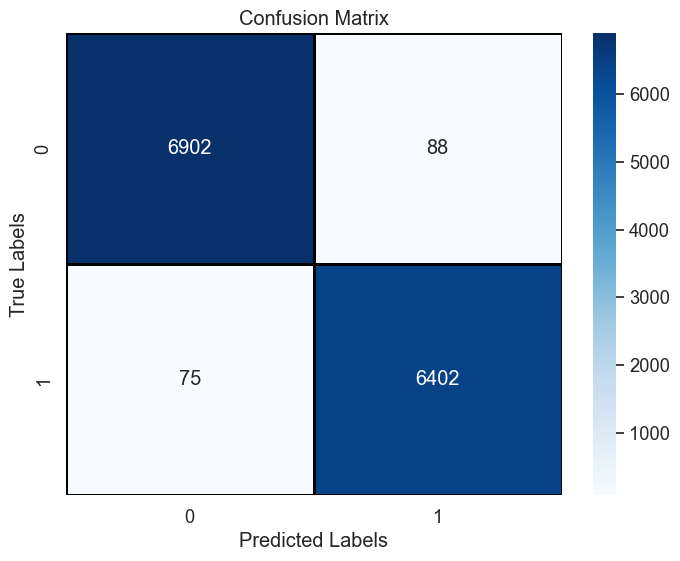

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 创建热图
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=2, linecolor="black")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()